In [149]:
import numpy as np
import pandas as pd
import lda
import lda.datasets
import pylab as plt
%matplotlib inline

results_prefix = 'beer'
binary = False
if not binary:
    results_prefix += "_multinomial"

<p>Note that X needs to be DOCUMENTS x WORDS</p>

In [150]:
if results_prefix == 'beer':
    data = pd.read_csv('QC_Beer_ParentsFragments_Tonyscripting.csv',index_col=0)
else:
    data = pd.read_csv('Urine_FragmentsParents_MS2filter5000_Tonyscripting.csv',index_col=0)

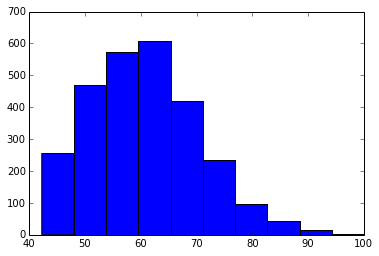

In [151]:
if binary:
    data = data.replace(np.nan,0)
    data[data>0] = 1
    data = data.transpose()
    print data.shape
else:
    data = np.log(data)
    min_val = data.min().min()
    data /= data.max().max()
    data *= 100
    from scipy.sparse import coo_matrix
    data = data.replace(np.nan,0)
    data = data.transpose()
    sd = coo_matrix(data)
    plt.hist(sd.data)
    sd = sd.floor()  

In [152]:
npdata = np.array(sd.todense(),dtype='int64')
n_topics = 50

In [153]:
model = lda.LDA(n_topics = n_topics, n_iter=1000, random_state=1)

In [154]:
model.fit(npdata)

<lda.lda.LDA instance at 0x111d1e710>

In [155]:
topic_fragments = model.topic_word_
n_top_frags = 20
with open(results_prefix + 'topics.csv','w') as f:
    for i,topic_dist in enumerate(topic_fragments):
        topic_f = np.array(data.columns.values)[np.argsort(topic_dist)][:-n_top_frags:-1]
        out_string = 'Topic {},{}'.format(i, ','.join(topic_f.astype('str')))
        print(out_string)
        f.write(out_string+'\n')
        

Topic 0,128.95354,62.98187,234.91731,61.97413,340.88177,358.89194,88.03927,134.04488,74.02408,130.04994,274.90973,136.94031,70.02884,158.04494,116.0342,151.9269,151.05171,72.08083,168.94614
Topic 1,95.01352,124.01688,123.00871,168.00698,183.03001,96.95995,139.04015,139.00367,125.02432,87.07458,179.14447,86.07133,87.06846,69.034,97.02924,79.01854,86.06079,139.00542,130.05117
Topic 2,90.05474,87.05524,163.06013,61.02862,97.02845,91.05839,145.04957,127.039,69.03355,70.02884,132.07666,115.04993,60.05591,74.02408,93.05474,133.08003,91.05202,91.03913,158.05646
Topic 3,73.02898,134.06104,161.04611,55.01818,81.03412,100.04268,91.36077,116.60239,166.53802,122.02506,106.82732,120.66083,94.02956,99.00896,97.74564,52.90919,70.91358,78.03465,59.22683
Topic 4,93.03442,101.02458,74.02408,99.04523,150.05652,65.03902,163.06198,119.05045,121.03001,119.05103,125.02432,87.00835,135.04537,180.06699,163.04114,199.00685,107.0503,111.21661,96.96939
Topic 5,99.00896,127.04988,185.10292,170.0799,110.0715,333.15

<p>Output in a fragments x topics matrix of probabilities - almost certainly an easier way of doing this, but I'm enjoying playing with PANDAS data structures..</p>

In [156]:
topic = model.topic_word_
masses = np.array(data.transpose().index)
d = {}
for i in np.arange(n_topics):
    topic_name = i
    topic_series = pd.Series(topic[i],index=masses)
    d[topic_name] = topic_series
topicdf = pd.DataFrame(d)


In [157]:
topicdf.to_csv(results_prefix+'all.csv')

In [158]:
doc = model.doc_topic_
(n_doc,a) = doc.shape

In [159]:
topic_index = np.arange(n_topics)
doc_names = np.array(data.index)
d = {}
for i in np.arange(n_doc):
    doc_name = doc_names[i]
    doc_series = pd.Series(doc[i],index=topic_index)
    d[doc_name] = doc_series
docdf = pd.DataFrame(d)
cols = docdf.columns.tolist()
mass_rt = [(float(m.split('_')[0]),float(m.split('_')[1])) for m in cols]
sorted_mass_rt = sorted(mass_rt,key=lambda m:m[0])
ind = [mass_rt.index(i) for i in sorted_mass_rt]
docdf = docdf[ind]


In [160]:
docdf.to_csv(results_prefix+'docs.csv')

In [161]:

print data.index

Index([u'74.06883_663.25', u'78.95893_643.635', u'79.95739_413.486', u'87.04354_552.191', u'90.05497_626.476', u'94.06502_966.216', u'96.96013_680.973', u'97.96442_680.973', u'98.957_680.973', u'100.05051_559.756', u'100.98534_1198.51', u'102.09131_904.499', u'103.0947_904.499', u'104.10697_878.25', u'104.07049_605.534', u'104.07014_552.191', u'105.10989_878.25', u'107.98137_734.261', u'110.0624_615.033', u'110.05114_483.703', u'111.01699_685.046', u'115.06868_487.516', u'116.02435_663.25', u'116.1069_807.281', u'116.95958_1254.69', u'117.02076_599.844', u'117.05621_411.602', u'118.08634_527.603', u'118.06103_661.282', u'120.0645_609.314', u'121.02952_405.95', u'121.07122_535.15', u'122.02513_609.314', u'122.96913_1200.59', u'124.00751_632.132', u'124.08709_554.101', u'126.02045_632.132', u'126.10253_930.238', u'126.95666_502.747', u'127.03645_630.246', u'128.04601_474.222', u'128.95375_1200.59', u'129.01933_698.936', u'129.07599_624.592', u'130.0499_472.338', u'130.05755_622.652', u'1